In [1]:
#импортируем все необходимые библиотеки для анализа данных

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date,timedelta

%matplotlib inline

In [2]:
# настройка графиков
sns.set(
    font_scale = 1,
    style = "whitegrid",
    rc={'figure.figsize':(20,7)}
        )

Проект E-commerce (1-вариант). 

Данный проект представляет из себя анализ покупки товаров клиентами. Для проведения анализа мы имеем 3 основных датасета, в которых хранятся различные данные. Представленные датасеты мы будем использовать как входные данные и ответим на последующие вопросы. 

Вопрос №1: Какое количество пользователей совершили покупку только один раз?

In [3]:
#1. Считываем данные из файла "olist_customers_datase.csv" и сохраняем в датафрейм "customers". 
customers = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/My_first_project/olist_customers_dataset.csv')
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [4]:
#2. Изучаем полученный датафрейм. Обращаем внимание на тип данных.
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
#3. Считаем количество уникальных значений в каждом столбце.
customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

Как мы уже заметили из третьего шага (#3), количество уникальных customer_id и customer_unique_id не совпадают, кроме того количество значений в customer_id больше чем в customer_unique_id. 
Отсюда мы можем уже сделать первый вывод: какое-то количество пользователей совершили больше одной покупки. 
Под определением "пользователь" будем учитывать уникальный идентификатор, который приведен в столбце customer_unique_id (один уникальный идентификатор = 1 пользователь).

In [6]:
#4. Считываем данные из файла "olist_orders_dataset.csv" и сохраняем в датафрейм "orders". 
orders = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/My_first_project/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [7]:
#5. Изучаем полученный датафрейм. Обращаем внимание на тип данных.
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Из данных датафрейма order можно заметить (шаг #5), что количество значений в столбце order_purchase_timestamp (время создания заказа) и order_approved_at (время подтверждения оплаты заказа) не совпадают. Отсюда можем сделать вывод, что не все созданные заказы в последующим оплачивались, соответсвенно их мы не можем считать покупкой. Например, из практики мы знаем ситуации, когда клиент добавляет товары в корзинку, но, при оформлении заказа передумывает, и не оплачивает.

Поэтому, чтобы ответить на поставленный вопрос, мы должны выяснить какие заказы будем учитывать как "совершенную покупку". Далее проанализируем 3 столбца из датафрейма orders: order_status, order_purchase_timestamp, order_approved_at.

In [8]:
#6. Переводим тип данных в формат datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])

In [9]:
#7. Считаем количество пропущенных значений
orders['order_purchase_timestamp'].isna().sum()

0

In [10]:
#8. Считаем количество пропущенных значений
orders['order_approved_at'].isna().sum()

160

In [11]:
#9. Считаем количество пропущенных значений
orders['order_status'].isna().sum() 

0

In [12]:
#10. Сравниваем значения в стоблцах order_purchase_timestamp и order_approved_at
(orders['order_purchase_timestamp'] <= orders['order_approved_at']).sum()

99281

In [13]:
#11. Выясним к какому статусу относятся заказы, у которых отсутствуют дата подтверждения оплаты 
orders.query("order_approved_at == 'NaN'") \
    .groupby('order_status', as_index = False) \
    .agg({'customer_id': 'count'})

,order_status,customer_id
0,canceled,141
1,created,5
2,delivered,14


Шаги 6-11 были сделаны для того, чтобы выяснить какие заказы будем учитывать как "совершенные покупки". Из 8-ого шага заметили, что в столбце order_approved_at отсутствуют 160 значений. Из 10-ого шага видно, что время создания заказа в 99281 случаях равно или меньше времени подтверждения оплаты заказа - это говорит о качестве данных, и еще раз потверждает наше предположение о том, что не все созданные заказы в дальнейшем оплачивались.
Из 11-ого шага можно наблюдать странную ситуацию, когда статус заказа "delivered", но для такого заказа отсутствует время подтверждения оплаты заказа.

Из проведенного анализа, мы можем прийти к следующему выводу: совершенные покупки - это те покупки, у которых имеется время подтверждения оплаты заказа. Стоит отметить, что работа со статусом заказа может привести к ошибочному результату.

In [14]:
#12 Объединяем два датафрейма по ключу customer_id, перетаскиваем только столбец customer_unique_id
full_df_1 = orders.merge(customers[['customer_id', 'customer_unique_id']], how = 'left', on = 'customer_id') \
    .drop(columns = {'order_id',
                     'order_status',
                     'order_purchase_timestamp', 
                     'order_delivered_carrier_date', 
                     'order_delivered_customer_date', 
                     'order_estimated_delivery_date'})
full_df_1

,customer_id,order_approved_at,customer_unique_id
0,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,7c396fd4830fd04220f754e42b4e5bff
1,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,af07308b275d755c9edb36a90c618231
2,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,3a653a41f6f9fc3d2a113cf8398680e8
3,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,7c142cf63193a1473d2e66489a9ae977
4,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,72632f0f9dd73dfee390c9b22eb56dd6
...,...,...,...
99436,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a
99437,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,da62f9e57a76d978d02ab5362c509660
99438,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,737520a9aad80b3fbbdad19b66b37b30
99439,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,5097a5312c8b157bb7be58ae360ef43c


In [15]:
#13. Находим количество уникальных пользователей, которые совершили покупку только один раз
purchase_number = full_df_1.query("order_approved_at != 'NaN'") \
    .groupby('customer_unique_id', as_index = False) \
    .agg({'customer_id': 'count'}) \
    .rename(columns = {'customer_id': 'purchase_number'}) \
    .sort_values('purchase_number', ascending = False) \
    .query("purchase_number == '1'")
purchase_number

,customer_unique_id,purchase_number
64130,aac46148455c5cec5aa879c45135bf7d,1
64235,aafe4a691761f6b35d1357638b299b0a,1
64137,aac7886e3b08758ecab2f7aa5acaa812,1
64233,aafcddd4f1e7276191219b5418654b80,1
64131,aac4972475b8832c62f3d91891799ccd,1
...,...,...
32466,56546b71f8bf254f860014fae431af6d,1
32464,565427a96f0865bacef2a6b400197b46,1
32463,565283fe12fa1a894ef451c4bfb391ed,1
32462,5650e95cbd234d30d80befa7c4ab1618,1


В 12-ом шаге мы объединяем два датафрейма: к датафрейму orders примерживаем столбец customer_unique_id из датафрейма customers, при этом ключом объединения послужит столбец customer_id. Также, сразу дропаем ненужные столбцы. Полученный датафрейм называем full_df_1.
Шаг 13: из полученного датафрейма full_df_1 выбераем те строки, где в столбце order_approved_at отсутсвуют пустые значения. Далее сгруппируем уникальные ID пользователей, и посчитаем какое количество покупок совершил каждый из них. Среди всех данных уникальных пользователей выбираем только те, которые совершили покупку только один раз. Результаты сохраняем в датафрейм под названием purchase_number. 

Таким образом, количество пользователей, совершивших только одну покупку равняется 93049.

Вопрос №2: Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [16]:
#1.Чтобы не портить оригинальный датафрейм "orders", создаем копию данного датафрейма под названием "avg_order"
avg_order = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/My_first_project/olist_orders_dataset.csv')
avg_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [17]:
#2. Приводим необходимые столбцы к формату datetime. Дату оплаты переформатируем в месяц/год.
avg_order['order_delivered_customer_date'] = pd.to_datetime(avg_order['order_delivered_customer_date'], format='%Y%m%d %H:%M:%S')
avg_order['order_approved_at'] = pd.to_datetime(avg_order['order_approved_at'], format='%Y%m%d %H:%M:%S')
avg_order['order_approved_at'] = avg_order['order_approved_at'].dt.strftime('%m/%Y')

In [18]:
#3. Перевели в формат месяц/год.
avg_order['order_approved_at']

0        10/2017
1        07/2018
2        08/2018
3        11/2017
4        02/2018
          ...   
99436    03/2017
99437    02/2018
99438    08/2017
99439    01/2018
99440    03/2018
Name: order_approved_at, Length: 99441, dtype: object

In [19]:
#4. Произведение расчетов.
avg_order_by_month = avg_order.query("order_delivered_customer_date == 'NaN' & order_approved_at != 'NaN'") \
    .groupby(['order_status', 'order_approved_at'], as_index = False) \
    .agg({'customer_id': 'count'}) \
    .sort_values('customer_id', ascending = False) \
    .groupby('order_status', as_index = False) \
    .agg({'customer_id': 'mean'}) \
    .sort_values('customer_id', ascending = False) \
    .rename(columns = {'customer_id': 'avg_order'})

Описание шага #4: Для того, чтобы выяснить количество недоставленных заказов (=покупок), сначала отбрасываем те заказы, у которых отсутствует дата подтверждение оплаты (order_approved_at), далее выбираем все заказы, у которых отсутствует дата доставки (order_delivered_customer_date). Предварительно сгруппировав статусы заказов и месяц заказа, посчитаем количество заказов. Таким образов, мы сможем определить количество заказов в месяц, относящихся к определенному статусу. Далее, сгрупируем статусы заказов и посчитаем их среднее значение. Стоит отметить, что мы игнорировали год, так как хотели показать именно среднее значение заказов не доставляемых в месяц.

In [20]:
#5. Приводим результаты в читабельный вид.
avg_order_by_month['avg_order'] = round(avg_order_by_month['avg_order'], 2)
avg_order_by_month

,order_status,avg_order
5,shipped,50.32
6,unavailable,29.00
1,canceled,22.76
4,processing,15.84
3,invoiced,14.95
2,delivered,2.00
0,approved,1.00


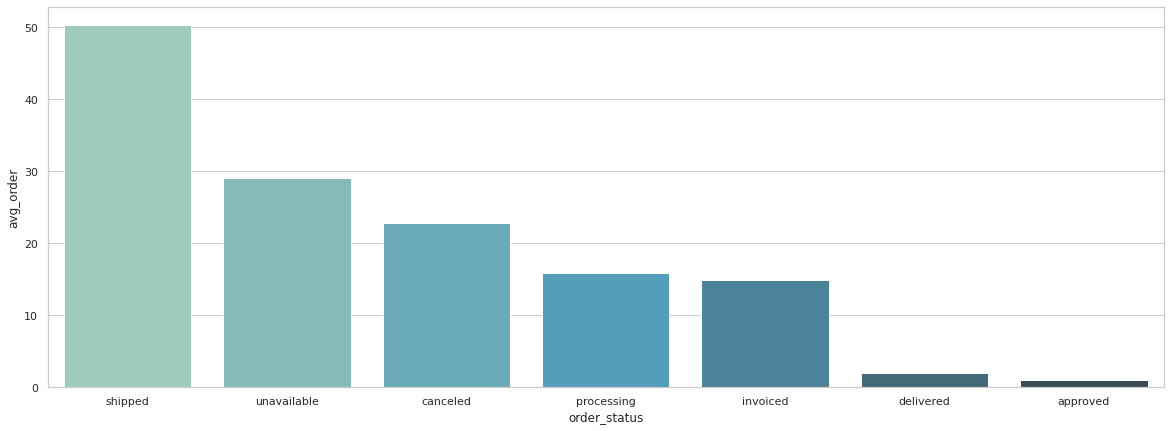

In [21]:
#6. Визуализируем полученные результаты. 
sns.barplot(x = avg_order_by_month['order_status'], 
            y = avg_order_by_month['avg_order'], 
            data = avg_order_by_month, palette="GnBu_d")

Таким образом, детализация среднего количества заказов в месяц, которые не доставляются имеет вышеуказанный вид. В среднем большинство заказов не доставляются имеют статусы: отгружен со склада, недоступен и отменен.

Вопрос №3: По каждому товару определить, в какой день недели товар чаще всего покупается.

In [22]:
#1.Считываем данные из файла "olist_order_items_dataset.csv" и сохраняем в датафрейм "order_items". 
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/My_first_project/olist_order_items_dataset.csv')
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [23]:
#2. Смотрим на тип данных и на количество в каждой колонке.
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [24]:
#3. Объединяем датафреймы, перетаскиваем столбец "order_approved_at"
order_by_day = order_items.merge(orders[['order_id', 'order_approved_at']], how = 'left', on = 'order_id')
order_by_day = order_by_day.dropna()
order_by_day.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_approved_at
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 09:45:35
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 11:05:13
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:48:30
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:10:18
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 14:10:13


In [25]:
#4. Переводим столбец "order_approved_at" в нужный формат, а также извлекаем день недели
order_by_day['order_approved_at'] = pd.to_datetime(order_by_day['order_approved_at'], format='%Y%m%d %H:%M:%S')
order_by_day['day_name'] = order_by_day['order_approved_at'].dt.day_name()
order_by_day.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_approved_at,day_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:48:30,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:10:18,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 14:10:13,Saturday


Шаги #1-4 были проделаны для того, чтобы подготовить почву для дальнейшего анализа: мы объединили два датафрейма, получили необходимые столбцы, а именно product_id (код товара) и order_approved_at (дату покупки товара), а также мы извлекли день недели, в котором покупался конкретный товар (столбец - day_name). Далее, мы будем работать с перечисленными столбцами, чтобы узнать в какой день недели чаще всего покупался конкретный товар.

In [26]:
#5. Сгруппируем товары и дни недели, по ним посчитаем количество продаж
grouping_product_id = order_by_day.groupby(['product_id', 'day_name'], as_index = False) \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'number_product'}) \
    .sort_values('number_product', ascending = False)
grouping_product_id

,product_id,day_name,number_product
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
41077,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,96
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
41083,aca2eb7d00ea1a7b8ebd4e68314663af,Wednesday,89
...,...,...,...
23986,63ee501f72520d5ec54cef5fd3a21a20,Wednesday,1
23988,63f4d40c05db6ade462cecef857eec34,Monday,1
23990,63f4d40c05db6ade462cecef857eec34,Wednesday,1
23991,63f52009dc3ddb733394e80183aed0f0,Saturday,1


По результатам шага #5, теперь мы знаем в какой день недели сколько раз покупался конкретный товар. Но, мы хотим извлечь день, в котором чаще всего покупается товар, то есть максимальное количество продаж.

Для того, чтобы найти максимальное количество продаж по каждому товару, сначала будем игнорировать дни недели, и находим максимальное количество продаж по каждому уникальному товару (шаг #6). Далее по уникальному коду товара (product_id) и максимальному количеству продаж (number_product) объединяем их с ранее полученной таблицей(grouping_product_id), чтобы получить дни недели (шаг #7). 

In [27]:
#6. Находим максимальное количество продаж каждого товара
max_purchases = pd.DataFrame(grouping_product_id.groupby('product_id')['number_product'].max()) \
    .sort_values('number_product', ascending = False) \
    .reset_index()
max_purchases

,product_id,number_product
0,aca2eb7d00ea1a7b8ebd4e68314663af,119
1,53b36df67ebb7c41585e8d54d6772e08,105
2,422879e10f46682990de24d770e7f83d,89
3,99a4788cb24856965c36a24e339b6058,82
4,368c6c730842d78016ad823897a372db,80
...,...,...
32943,62874f62bbdeec35f7cd827b1716c47e,1
32944,628677036f276f6c0792cded8e9211ee,1
32945,6281a79f478d260d81da138f7e03c0bb,1
32946,627dce1ab24323cb7ac147cad5ac0b8c,1


In [28]:
#7. Объединяем дни недели по коду товару и количеству продаж
df = max_purchases.merge(grouping_product_id, on = ['product_id', 'number_product'], how = 'left')
df

,product_id,number_product,day_name
0,aca2eb7d00ea1a7b8ebd4e68314663af,119,Tuesday
1,53b36df67ebb7c41585e8d54d6772e08,105,Tuesday
2,422879e10f46682990de24d770e7f83d,89,Tuesday
3,99a4788cb24856965c36a24e339b6058,82,Tuesday
4,368c6c730842d78016ad823897a372db,80,Thursday
...,...,...,...
42621,628677036f276f6c0792cded8e9211ee,1,Wednesday
42622,6281a79f478d260d81da138f7e03c0bb,1,Friday
42623,6281a79f478d260d81da138f7e03c0bb,1,Thursday
42624,627dce1ab24323cb7ac147cad5ac0b8c,1,Friday


Далее мы имеем следующую ситуацию: максимальное количество продаж по определенному товару мог быть не уникальным, то есть какой-то товар, условно, мог покупаться 10 раз и в среду, и в четверг, и если 10 раз это максимальное значение для данного товара, тогда мы будем иметь дупликаты. 

Полученные результаты делим на 2 части: шаг #8 показывается список уникальных товаров с максимальной продажай в определенный день недели, в то время как шаг #11 показывает список товаров, когда максимальное количество прожад приходится не на определенный день недели. Например, товар "000b8f95fcb9e0096488278317764d19" продавался 1 раз и в пятницу, и в среду. Такие моменты лучше оставить для дальнейшего обсуждения с бизнесом.

In [29]:
#8. Количетсво максимальных продаж (уникальных) по дням.
df_without_duplicates = df.drop_duplicates(subset=['product_id', 'number_product'], keep=False) \
                                .sort_values('number_product', ascending = False)
df_without_duplicates

,product_id,number_product,day_name
0,aca2eb7d00ea1a7b8ebd4e68314663af,119,Tuesday
1,53b36df67ebb7c41585e8d54d6772e08,105,Tuesday
2,422879e10f46682990de24d770e7f83d,89,Tuesday
3,99a4788cb24856965c36a24e339b6058,82,Tuesday
4,368c6c730842d78016ad823897a372db,80,Thursday
...,...,...,...
21550,c01cc7b6054e22d68972a35df1e0c249,1,Wednesday
21551,c01d651edb7447f99b72c1fb123f7b38,1,Saturday
21552,c04ad94639d284d69b5ca0642a44f445,1,Wednesday
21553,c048c78e247ffc5c2493a9a39e0fc5cd,1,Wednesday


In [30]:
#9. Подготовка для визуализации.
df_without_duplicates_fig = df_without_duplicates.groupby('day_name', as_index = False) \
    .agg({'product_id': 'count'}) \
    .rename(columns = {'product_id': 'number_purchases'}) \
    .sort_values('number_purchases')

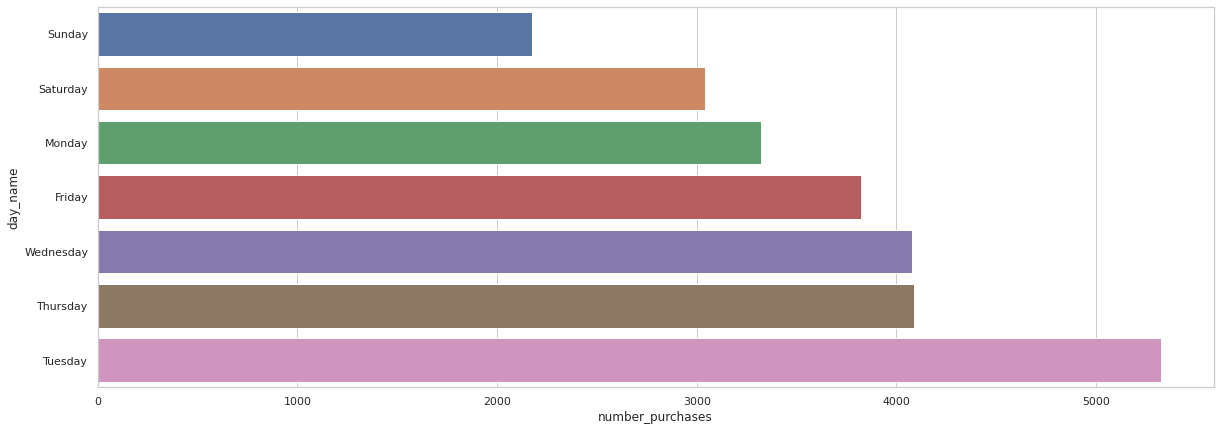

In [31]:
#10. График продаж уникальных товаров по дням недели.
sns.barplot(x = 'number_purchases', 
            y = 'day_name', 
            data = df_without_duplicates_fig)

In [32]:
#11. Количетсво максимальных продаж (повторяющихся) по дням.
df_with_duplicates = df[df.duplicated(subset=['product_id'], keep = False)]
df_with_duplicates

,product_id,number_product,day_name
32,d5991653e037ccb7af6ed7d94246b249,30,Tuesday
33,d5991653e037ccb7af6ed7d94246b249,30,Thursday
102,617186c3d97ea56c9c683a8a3974e8c1,18,Thursday
103,617186c3d97ea56c9c683a8a3974e8c1,18,Tuesday
133,2a2d22ae30e026f1893083c8405ca522,16,Thursday
...,...,...,...
42618,62892a47bea324c325a4556b66baef9d,1,Thursday
42620,628677036f276f6c0792cded8e9211ee,1,Thursday
42621,628677036f276f6c0792cded8e9211ee,1,Wednesday
42622,6281a79f478d260d81da138f7e03c0bb,1,Friday


Таким образом, мы выяснили в какой день недели чаще всего продается определенный набор товаров (df_without_duplicates), а также наблюдаем ситуацию, когда максимальное количество продаж товара приходится на несколько дней в недел (df_with_duplicates).

По полученному графику в шаге #10, можно сделать вывод, что больше продаж происходит во вторник.

Вопрос №4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [33]:
#1. Объединяем датафреймы, отбрасываем ненужные столбцы, и оставляем необходимые стобцы.
merging = orders.merge(customers[['customer_id', 'customer_unique_id']], how = 'left', on = 'customer_id') \
    .drop(columns = {'order_id',
                     'order_status',
                     'order_purchase_timestamp', 
                     'order_delivered_carrier_date', 
                     'order_delivered_customer_date', 
                     'order_estimated_delivery_date'})
order_number = merging[['customer_unique_id', 'customer_id', 'order_approved_at']]
order_number = order_number.dropna()
order_number

,customer_unique_id,customer_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27
2,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23
3,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59
4,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29
...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05
99437,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37
99438,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16
99439,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21


In [34]:
#2. Извлекаем из даты: год, месяц, количество недель в месяце, и количечтво дней внутри месяца
order_number['order_approved_at'] = pd.to_datetime(order_number['order_approved_at'], format='%Y%m%d %H:%M:%S')
order_number['days_in_month'] = order_number['order_approved_at'].dt.days_in_month
order_number['weeks_in_month'] = round(order_number['days_in_month']/7, 2)
order_number['year'] = order_number['order_approved_at'].dt.year
order_number['month'] = order_number['order_approved_at'].dt.month_name()
order_number = order_number[['customer_unique_id',
                             'customer_id',
                             'order_approved_at',
                             'year',
                             'month',
                             'weeks_in_month',
                             'days_in_month']]
order_number

,customer_unique_id,customer_id,order_approved_at,year,month,weeks_in_month,days_in_month
0,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,2017-10-02 11:07:15,2017,October,4.43,31
1,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-26 03:24:27,2018,July,4.43,31
2,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:55:23,2018,August,4.43,31
3,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,2017-11-18 19:45:59,2017,November,4.29,30
4,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 22:20:29,2018,February,4.00,28
...,...,...,...,...,...,...,...
99436,6359f309b166b0196dbf7ad2ac62bb5a,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09 09:54:05,2017,March,4.43,31
99437,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,2018-02-06 13:10:37,2018,February,4.00,28
99438,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,2017-08-27 15:04:16,2017,August,4.43,31
99439,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08 21:36:21,2018,January,4.43,31


In [35]:
#3. Рассчитываем количество покупок в месяц каждого покупателя.
avg_order_number = order_number.groupby(['customer_unique_id', 'month', 'weeks_in_month'], as_index = False) \
    .agg({'customer_id': 'count'}) \
    .rename(columns = {'customer_id': 'order_number'}) \
    .sort_values('order_number', ascending = False)
avg_order_number

,customer_unique_id,month,weeks_in_month,order_number
7313,12f5d6e1cbf93dafd9dcc19095df0b3d,January,4.43,6
53937,8d50f5eadf50201ccdcedfb9e2ac8455,July,4.43,5
50535,83e7958a94bd7f74a9414d8782f87628,January,4.43,4
67630,b08fab27d47a1eb6deda07bfd965ad43,September,4.29,4
69267,b4e4f24de1e8725b74e4a1f4975116ed,February,4.00,4
...,...,...,...,...
32816,55a5d857599f61f045f9956f9180262d,July,4.43,1
32815,55a55b65ef7f279bf0e5846a645e5ba6,December,4.43,1
32814,55a4c5ebfd8fcc86eb83882fa0464977,January,4.43,1
32813,55a44284e2c362a0199fb0df3ea9fb7d,September,4.29,1


In [36]:
#4. Рассчитываем среднее количество покупок в неделю каждого покупателя.
avg_order_number['avg_order_number_by_week'] = round(avg_order_number['order_number'] / avg_order_number['weeks_in_month'], 2)
avg_order_number

,customer_unique_id,month,weeks_in_month,order_number,avg_order_number_by_week
7313,12f5d6e1cbf93dafd9dcc19095df0b3d,January,4.43,6,1.35
53937,8d50f5eadf50201ccdcedfb9e2ac8455,July,4.43,5,1.13
50535,83e7958a94bd7f74a9414d8782f87628,January,4.43,4,0.90
67630,b08fab27d47a1eb6deda07bfd965ad43,September,4.29,4,0.93
69267,b4e4f24de1e8725b74e4a1f4975116ed,February,4.00,4,1.00
...,...,...,...,...,...
32816,55a5d857599f61f045f9956f9180262d,July,4.43,1,0.23
32815,55a55b65ef7f279bf0e5846a645e5ba6,December,4.43,1,0.23
32814,55a4c5ebfd8fcc86eb83882fa0464977,January,4.43,1,0.23
32813,55a44284e2c362a0199fb0df3ea9fb7d,September,4.29,1,0.23


In [37]:
#5. Посчитали сколько покупателей в среднем покупают в неделю (по месяцам).
avg_order_number['segmentation'] = pd.cut(avg_order_number['avg_order_number_by_week'], [0, 1, 2, 6], labels = ['меньше 1 покупки', 'от 1 до 2 покупок', 'больше 2 покупок'])
avg_order_number.groupby(['month','segmentation']).agg({'customer_unique_id': 'count'})

customer_unique_id
month     segmentation                         
April     меньше 1 покупки                 9062
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
August    меньше 1 покупки                10832
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
December  меньше 1 покупки                 5761
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
February  меньше 1 покупки                 8284
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
January   меньше 1 покупки                 7809
          от 1 до 2 покупок                   1
          больше 2 покупок                    0
July      меньше 1 покупки                10003
          от 1 до 2 покупок                   1
          больше 2 покупок                    0
June      меньше 1 покупки                 9309
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
March     меньше 1 покупки                 9833
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
May       меньше 1 покупки                10621
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
November  меньше 1 покупки                 7284
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
October   меньше 1 покупки                 4838
          от 1 до 2 покупок                   0
          больше 2 покупок                    0
September меньше 1 покупки                 4230
          от 1 до 2 покупок                   0
          больше 2 покупок                    0

Таким образом, мы можем сделать вывод что у большинство из пользователей в среднем меньше 1 покупки в неделю даже если смотреть по месяцам. 

Вопрос №5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц.

Так как во всех предыдущих ситуациях мы работали с понятием "покупки", и в этот раз я решил выбрать отправной точкой для когортного анализа дату первой покупки. Если быть точнее дата произведение первой оплаты для пользователя, станет его отправной точкой. Начнем работу с датафреймом order_number, который был сформирован на шаге #1 для ответа на четвертый вопроc.

In [38]:
#1.Работаем только с 2017 годом, так как период с января по декабрь подходит только для этого года
order_number.query("year == '2017'").groupby('month', as_index = False).agg({'days_in_month': 'count'})

,month,days_in_month
0,April,2374
1,August,4348
2,December,5832
3,February,1765
4,January,760
5,July,3974
6,June,3252
7,March,2689
8,May,3693
9,November,7395


In [39]:
#2.Нам нужно связать покупателей, совершивших покупку в 2017 году и даты их оплаты.
purchase_number = order_number.query("year == '2017'")[['customer_unique_id', 'order_approved_at']]
purchase_number

,customer_unique_id,order_approved_at
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 22:10:13
6,36edbb3fb164b1f16485364b6fb04c73,2017-04-13 13:25:17
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:22:11
...,...,...
99433,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 20:07:14
99434,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 01:05:25
99435,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-23 09:15:11
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05


In [40]:
#3. Из даты оплаты покупки "order_approved_at", сформируем месяц совершение оплаты "purchase_date"
purchase_number['purchase_date'] = purchase_number['order_approved_at'].dt.strftime('%Y-%m')
purchase_number['purchase_date'] = pd.to_datetime(purchase_number['purchase_date'], format = '%Y-%m')

In [41]:
#4. Находим отправную точку (=дату) для когорты "cohort_month".
purchase_number['cohort_month'] = purchase_number.groupby('customer_unique_id')['purchase_date'].transform('min')
purchase_number

,customer_unique_id,order_approved_at,purchase_date,cohort_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01,2017-09-01
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11-01,2017-11-01
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 22:10:13,2017-07-01,2017-07-01
6,36edbb3fb164b1f16485364b6fb04c73,2017-04-13 13:25:17,2017-04-01,2017-04-01
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:22:11,2017-05-01,2017-05-01
...,...,...,...,...
99433,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 20:07:14,2017-10-01,2017-10-01
99434,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 01:05:25,2017-01-01,2017-01-01
99435,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-23 09:15:11,2017-02-01,2017-02-01
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03-01,2017-03-01


In [42]:
#5. Пример в лице пользователя "7c396fd4830fd04220f754e42b4e5bff"
purchase_number[purchase_number['customer_unique_id'] == '7c396fd4830fd04220f754e42b4e5bff']

,customer_unique_id,order_approved_at,purchase_date,cohort_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01,2017-09-01
62147,7c396fd4830fd04220f754e42b4e5bff,2017-09-04 11:43:25,2017-09-01,2017-09-01


Так как когорты будут строяться по-месячно, в шаге #3, из столбца "order_approved_at" мы зафиксировали месяцы, в котором производились оплаты, и сохранили полученную информацию в столбец purchase_date. Теперь, для каждого пользователя мы знаем в каких месяцах он совершал покупку. Далее, мы сформировали столбец "cohort_month": месяц, в котором была произведена первая оплата каждого уникального пользователя (шаге #4). Таким образом, у нас имеется информация о первом платеже пользователя, а также в какие месяца он совершал покупки. Шаг #5 демонстрирует идею, которую мы реализовали.

In [43]:
#6. Формируем индексы для создания когорты. 
purchase_number['cohort_index'] = (purchase_number['purchase_date'].dt.month - purchase_number['cohort_month'].dt.month) + 1
purchase_number

,customer_unique_id,order_approved_at,purchase_date,cohort_month,cohort_index
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 11:07:15,2017-10-01,2017-09-01,2
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:45:59,2017-11-01,2017-11-01,1
5,80bb27c7c16e8f973207a5086ab329e2,2017-07-09 22:10:13,2017-07-01,2017-07-01,1
6,36edbb3fb164b1f16485364b6fb04c73,2017-04-13 13:25:17,2017-04-01,2017-04-01,1
7,932afa1e708222e5821dac9cd5db4cae,2017-05-16 13:22:11,2017-05-01,2017-05-01,1
...,...,...,...,...,...
99433,c716cf2b5b86fb24257cffe9e7969df8,2017-10-04 20:07:14,2017-10-01,2017-10-01,1
99434,e03dbdf5e56c96b106d8115ac336f47f,2017-01-27 01:05:25,2017-01-01,2017-01-01,1
99435,831ce3f1bacbd424fc4e38fbd4d66d29,2017-02-23 09:15:11,2017-02-01,2017-02-01,1
99436,6359f309b166b0196dbf7ad2ac62bb5a,2017-03-09 09:54:05,2017-03-01,2017-03-01,1


In [44]:
#7. Находим количество пользователей, которые совершали покупки в разные месяца.
cohort_df = purchase_number.groupby(['cohort_month', 'cohort_index'])['customer_unique_id'].apply(pd.Series.nunique)
cohort_df = pd.DataFrame(cohort_df).reset_index()
cohort_df

,cohort_month,cohort_index,customer_unique_id
0,2017-01-01,1,727
1,2017-01-01,2,4
2,2017-01-01,3,2
3,2017-01-01,4,1
4,2017-01-01,5,3
...,...,...,...
72,2017-10-01,2,30
73,2017-10-01,3,13
74,2017-11-01,1,7164
75,2017-11-01,2,39


In [45]:
#8. Формируем таблицу для визуализации когорты.
cohort_df_table = cohort_df.pivot(index = 'cohort_month', columns = 'cohort_index', values = 'customer_unique_id')
cohort_df_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,727.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,NaN,2.0,2.0
2017-02-01,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,NaN
2017-03-01,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,NaN,NaN
2017-04-01,2324.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,NaN,NaN,NaN
2017-05-01,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,NaN,NaN,NaN,NaN
2017-06-01,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,3844.0,20.0,13.0,8.0,13.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,4204.0,28.0,15.0,11.0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,4149.0,27.0,20.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Далее, в шаге #6 мы сформировали индексы для группировки когорт. Стоит отметить, что первый месяц (cohort_index = 1) интерпретируется следующим образом: распределили всех пользователей по дате первой оплаты, то есть получили когорту пользователей по месяцам совершения покупок. Результаты полученные в шаге #8 можно описать следующим образом: количество покупателей совершивших первую покупку 2017-01-01 составялет 727 человек, далее из них только 4 пользователя совершили покупку во второй месяц, в третий месяц - всего лишь 2 пользователя и так далее. 

Абсолютные значения не так хорошо воспринимаются для определенных выводов поэтому переводим их в доли, и находим когорту с самым высоким retention rate на 3 месяц. 

In [46]:
#9. Зафиксируем количество пользователей покупавших в первый месяц (100%).
cohort_sizes = cohort_df_table.iloc[:,0]
cohort_sizes

cohort_month
2017-01-01     727.0
2017-02-01    1736.0
2017-03-01    2643.0
2017-04-01    2324.0
2017-05-01    3592.0
2017-06-01    3148.0
2017-07-01    3844.0
2017-08-01    4204.0
2017-09-01    4149.0
2017-10-01    4433.0
2017-11-01    7164.0
2017-12-01    5638.0
Name: 1, dtype: float64

In [47]:
#10. Абсолютные значения переводим в проценты.
retention = round(cohort_df_table.divide(cohort_sizes, axis=0) * 100, 2)
retention

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,
2017-01-01,100.0,0.55,0.28,0.14,0.41,0.14,0.55,0.14,0.14,NaN,0.28,0.28
2017-02-01,100.0,0.23,0.23,0.17,0.40,0.12,0.23,0.17,0.12,0.23,0.12,NaN
2017-03-01,100.0,0.49,0.34,0.34,0.34,0.15,0.15,0.30,0.30,0.11,NaN,NaN
2017-04-01,100.0,0.60,0.22,0.17,0.30,0.26,0.34,0.26,0.34,NaN,NaN,NaN
2017-05-01,100.0,0.53,0.50,0.39,0.31,0.33,0.42,0.17,NaN,NaN,NaN,NaN
2017-06-01,100.0,0.48,0.35,0.41,0.25,0.35,0.38,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,0.52,0.34,0.21,0.34,0.18,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,0.67,0.36,0.26,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,0.65,0.48,0.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Шаги #9 и #10 были сделаны для того, чтобы перевести абсолютные значения в проценты. Теперь интерпретация полученных результатов станет более легким для воприятия. Например, только 0.55% пользователей, совершивших первую покупку в 2017-01-01, совершают очередную покупку во второй месяц.

In [48]:
#11. Подготовим индексы для визуализации.
retention.index = retention.index.strftime('%Y-%m')
retention.index

Index(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12'],
      dtype='object', name='cohort_month')

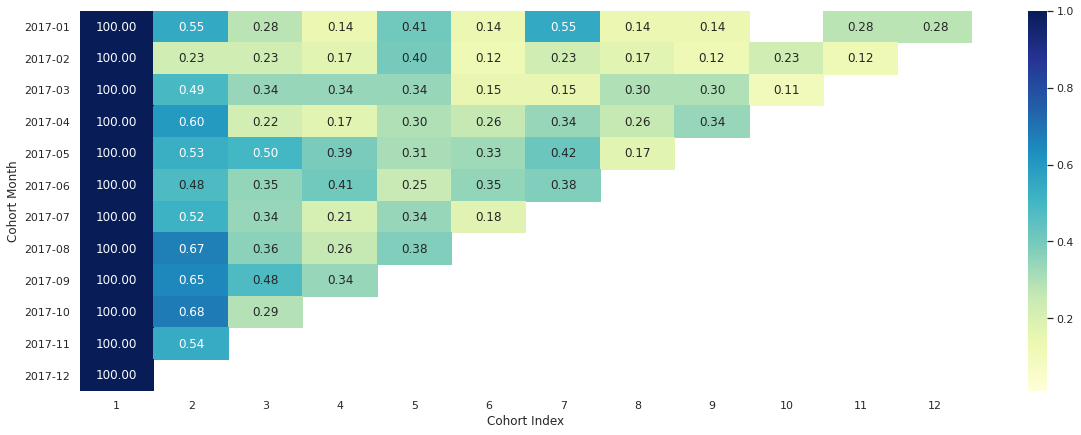

In [49]:
#12. Визуализируем полученные результаты.
sns.heatmap(retention, annot=True, fmt= '.2f', cmap='YlGnBu', vmin = 0.01 , vmax = 1.0)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.show()

Таким образом, самый высокий retention rate на 3 месяц составляет 0.41%, и приходится на когорту пользователей, которые совершили свои первые покупки  в июне 2017 года (2017-06).

Вопрос №6. RFM сегментация.

In [50]:
#1. Считываем данные из файла "olist_order_items_dataset.csv" и сохраняем в order_items
order_items = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-s-allaberganov/My_first_project/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [51]:
#2. Объединяем датафреймы orders и customers по customer_id 
first_join = orders.merge(customers[['customer_id', 'customer_unique_id']], how = 'left', on = 'customer_id')
first_join.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6


In [52]:
#3. Объединяес все три датафрейма 
full_df = order_items.merge(first_join, how = 'left', on = 'order_id') \
    .drop(columns = {'seller_id',
                    'shipping_limit_date',
                    'order_purchase_timestamp',
                    'order_delivered_carrier_date'})
full_df = full_df.reindex(columns = ['customer_unique_id', 
                               'customer_id', 
                               'order_id', 
                               'order_item_id', 
                               'order_status',
                               'product_id', 
                               'freight_value', 
                               'price', 
                               'order_approved_at', 
                               'order_delivered_customer_date', 
                               'order_estimated_delivery_date'])
full_df.head()

,customer_unique_id,customer_id,order_id,order_item_id,order_status,product_id,freight_value,price,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,4244733e06e7ecb4970a6e2683c13e61,13.29,58.90,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,1,delivered,e5f2d52b802189ee658865ca93d83a8f,19.93,239.90,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15 00:00:00
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,1,delivered,c777355d18b72b67abbeef9df44fd0fd,17.87,199.00,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05 00:00:00
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,1,delivered,7634da152a4610f1595efa32f14722fc,12.79,12.99,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20 00:00:00
4,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,1,delivered,ac6c3623068f30de03045865e4e10089,18.14,199.90,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17 00:00:00


In [53]:
#4. Изучаем типы данных, и количество элементов в каждой строке
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112650 entries, 0 to 112649
Data columns (total 11 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_id                       112650 non-null  object        
 3   order_item_id                  112650 non-null  int64         
 4   order_status                   112650 non-null  object        
 5   product_id                     112650 non-null  object        
 6   freight_value                  112650 non-null  float64       
 7   price                          112650 non-null  float64       
 8   order_approved_at              112635 non-null  datetime64[ns]
 9   order_delivered_customer_date  110196 non-null  object        
 10  order_estimated_delivery_date  112650 non-null  object        
dtype

In [54]:
#5. Добавляем новый столбец "revenue", который будет показывать полученный доход по каждому заказу
full_df['revenue'] = round(full_df['freight_value'] * full_df['price'], 2)
full_df.head()

,customer_unique_id,customer_id,order_id,order_item_id,order_status,product_id,freight_value,price,order_approved_at,order_delivered_customer_date,order_estimated_delivery_date,revenue
0,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,00010242fe8c5a6d1ba2dd792cb16214,1,delivered,4244733e06e7ecb4970a6e2683c13e61,13.29,58.90,2017-09-13 09:45:35,2017-09-20 23:43:48,2017-09-29 00:00:00,782.78
1,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,00018f77f2f0320c557190d7a144bdd3,1,delivered,e5f2d52b802189ee658865ca93d83a8f,19.93,239.90,2017-04-26 11:05:13,2017-05-12 16:04:24,2017-05-15 00:00:00,4781.21
2,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,000229ec398224ef6ca0657da4fc703e,1,delivered,c777355d18b72b67abbeef9df44fd0fd,17.87,199.00,2018-01-14 14:48:30,2018-01-22 13:19:16,2018-02-05 00:00:00,3556.13
3,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,00024acbcdf0a6daa1e931b038114c75,1,delivered,7634da152a4610f1595efa32f14722fc,12.79,12.99,2018-08-08 10:10:18,2018-08-14 13:32:39,2018-08-20 00:00:00,166.14
4,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,00042b26cf59d7ce69dfabb4e55b4fd9,1,delivered,ac6c3623068f30de03045865e4e10089,18.14,199.90,2017-02-04 14:10:13,2017-03-01 16:42:31,2017-03-17 00:00:00,3626.19


Я буду работать с обещанной датой доставки (order_estimated_delivery_date), чтобы определить дату, от которой буду рассчитывать RFM показатели.

In [55]:
#6. Переводим типы данных на тип datetime.
full_df['order_approved_at'] = pd.to_datetime(full_df['order_approved_at'])
full_df['order_delivered_customer_date'] = pd.to_datetime(full_df['order_delivered_customer_date'])
full_df['order_estimated_delivery_date'] = pd.to_datetime(full_df['order_estimated_delivery_date'])

In [56]:
#7. Выбираем максимальную (самую позднюю) дату доставки заказа и прибавляем к нему 1 день, и получаем дату, от которой будем считать RFM
last_date = full_df['order_estimated_delivery_date'].max() + timedelta(days=1)
last_date

Timestamp('2018-10-26 00:00:00')

Теперь, мы имеем дату, от которой будем рассчитывать показатели RFM - это "last_date", который равняется 2018-10-26. 
Далее будем по кусочкам вычислять необходимые показатели.

In [57]:
#8. R = recency (количество дней от самой поздней покупки)
recency = full_df.groupby('customer_unique_id', as_index = False)['order_approved_at'].max() \
    .rename(columns = {'order_approved_at': 'most_recent'})
recency

,customer_unique_id,most_recent
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52
...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47


In [58]:
#9. Рассчитываем количество дней от самой поздней покупки до last_date
recency['r_score'] = (last_date - recency['most_recent']).dt.days
recency

,customer_unique_id,most_recent,r_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,168.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,171.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,594.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,378.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,345.0
...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,504.0
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,319.0
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,625.0
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,176.0


In [59]:
#10. F = frequency (как часто клиент покупает). Чтобы определить частоту покупаемости, работаем с order_id
frequency = full_df.groupby('customer_unique_id', as_index = False)['order_id'] \
    .agg({'order_id': 'count'}) \
    .rename(columns = {'order_id': 'f_score'}) \
    .sort_values('f_score', ascending = False)
frequency

,customer_unique_id,f_score
74752,c8460e4251689ba205045f3ea17884a1,24
25885,4546caea018ad8c692964e3382debd19,21
73155,c402f431464c72e27330a67f7b94d4fb,20
39443,698e1cf81d01a3d389d96145f7fa6df8,20
5741,0f5ac8d5c31de21d2f25e24be15bbffb,18
...,...,...
33836,5a6e80d57bdde6b3a600cfae0c2f5e43,1
33835,5a6d092525ea183026c9b405b903fe0c,1
33834,5a6cda86d79e1ed11d38881398f56c59,1
33833,5a6cd8797286a15f0bf2fb97f024781c,1


In [60]:
#11. M = monetary  (общая сумма покупок, то есть работаем со столбцом revenue)
monetary = full_df.groupby('customer_unique_id', as_index = False)['revenue'] \
    .agg({'revenue': 'sum'}) \
    .rename(columns = {'revenue': 'm_score'}) \
    .sort_values('m_score', ascending = False)
monetary

,customer_unique_id,m_score
95131,ff4159b92c40ebe40454e3e6a7c35ed6,1479562.34
82230,dc4802a71eae9be1dd28f5d788ceb526,1308677.85
26015,459bef486812aa25204be022145caa62,1300110.09
55742,95a744604de66a2e40e18086e69be4f2,980664.83
89957,f140f377d666848e3712b51a2734d120,877434.66
...,...,...
15023,282dc25c4d1c3ef50a85b9d2f1b23570,0.00
65701,afdf6bba7bebb1b304027a7d34c3a529,0.00
90616,f30ba18c5ecb2b814dcbf77fedcbe195,0.00
9113,183d97c6495e9cd967743454253400fd,0.00


In [61]:
#12. Берем только тех клиентов, которые приносили доход больше нуля
monetary = monetary.query('m_score != 0')
monetary

,customer_unique_id,m_score
95131,ff4159b92c40ebe40454e3e6a7c35ed6,1479562.34
82230,dc4802a71eae9be1dd28f5d788ceb526,1308677.85
26015,459bef486812aa25204be022145caa62,1300110.09
55742,95a744604de66a2e40e18086e69be4f2,980664.83
89957,f140f377d666848e3712b51a2734d120,877434.66
...,...,...
66914,b33336f46234b24a613ad9064d13106d,25.86
70557,bd06ce0e06ad77a7f681f1a4960a3cc6,17.82
18518,317cfc692e3f86c45c95697c61c853a6,16.26
80635,d80730c15c647bc8f2ad77c908ba5ca9,15.50


In [62]:
#13. Собираем все показатели необходимые для RFM в единый датафрейм
merge_rf = recency.merge(frequency, on = 'customer_unique_id', how = 'left')
merge_rfm = merge_rf.merge(monetary, on = 'customer_unique_id', how = 'left')
merge_rfm

,customer_unique_id,most_recent,r_score,f_score,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,168.0,1,1558.80
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,171.0,1,156.68
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,594.0,1,1188.18
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,378.0,1,458.20
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,345.0,1,3040.20
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,504.0,2,392484.40
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,319.0,1,1277.68
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,625.0,1,2028.14
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,176.0,1,2149.35


In [63]:
#14. Сбрасываем (дропаем) все пустые значения
merge_rfm = merge_rfm.dropna()
merge_rfm

,customer_unique_id,most_recent,r_score,f_score,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,168.0,1,1558.80
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,171.0,1,156.68
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,594.0,1,1188.18
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,378.0,1,458.20
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,345.0,1,3040.20
...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:15:16,504.0,2,392484.40
95416,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:16:20,319.0,1,1277.68
95417,ffff371b4d645b6ecea244b27531430a,2017-02-07 16:02:44,625.0,1,2028.14
95418,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:58:47,176.0,1,2149.35


In [64]:
#15. Получили последнюю таблицу только с нужными столбцами.
rfm_table = merge_rfm[['customer_unique_id','r_score','f_score','m_score']]
rfm_table

,customer_unique_id,r_score,f_score,m_score
0,0000366f3b9a7992bf8c76cfdf3221e2,168.0,1,1558.80
1,0000b849f77a49e4a4ce2b2a4ca5be3f,171.0,1,156.68
2,0000f46a3911fa3c0805444483337064,594.0,1,1188.18
3,0000f6ccb0745a6a4b88665a16c9f078,378.0,1,458.20
4,0004aac84e0df4da2b147fca70cf8255,345.0,1,3040.20
...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,504.0,2,392484.40
95416,fffea47cd6d3cc0a88bd621562a9d061,319.0,1,1277.68
95417,ffff371b4d645b6ecea244b27531430a,625.0,1,2028.14
95418,ffff5962728ec6157033ef9805bacc48,176.0,1,2149.35


In [65]:
#16. Убеждаемся что в нашей конечной таблице не осталось пустых значений
rfm_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95075 entries, 0 to 95419
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  95075 non-null  object 
 1   r_score             95075 non-null  float64
 2   f_score             95075 non-null  int64  
 3   m_score             95075 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.6+ MB


In [66]:
#17. Настроиваем формат показа float значений, и смотрим на распределение наших показателей
pd.options.display.float_format = '{:.2f}'.format
rfm_table[['r_score', 'f_score', 'm_score']].describe()

,r_score,f_score,m_score
count,95075.00,95075.00,95075.00
mean,295.33,1.18,4281.89
std,153.23,0.62,18016.84
min,52.00,1.00,15.50
25%,171.00,1.00,659.07
50%,276.00,1.00,1441.97
75%,405.00,1.00,3211.86
max,770.00,24.00,1479562.34


In [67]:
#18. Видим, что частота покупок для большинство покупателей равняется одному. Данная информация необходима для кластеризации.
rfm_table.f_score.value_counts()

1     83241
2      8966
3      1668
4       631
5       254
6       198
7        46
8        16
9        11
10       11
11       11
12        9
14        3
13        2
15        2
20        2
21        1
16        1
18        1
24        1
Name: f_score, dtype: int64

In [68]:
#19. Делаем сегментацию покупателей, определяем границы сегментов по каждому показателю.
rfm_table['r_segment'] = pd.cut(rfm_table['r_score'], [0, 171, 276, 405, 770], labels = ['4', '3', '2', '1'])
rfm_table['f_segment'] = pd.cut(rfm_table['f_score'], [0, 1, 6, 11, 24], labels = ['1', '2', '3', '4'])
rfm_table['m_segment'] = pd.cut(rfm_table['m_score'], [0, 659.07, 1441.97, 3211.86, 1479562.35], labels = ['1', '2', '3', '4'])
rfm_table['RFMScore'] = rfm_table['r_segment'].astype(object) + rfm_table['f_segment'].astype(object) + rfm_table['m_segment'].astype(object)
rfm_table

,customer_unique_id,r_score,f_score,m_score,r_segment,f_segment,m_segment,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,168.00,1,1558.80,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,171.00,1,156.68,4,1,1,411
2,0000f46a3911fa3c0805444483337064,594.00,1,1188.18,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,378.00,1,458.20,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,345.00,1,3040.20,2,1,3,213
...,...,...,...,...,...,...,...,...
95415,fffcf5a5ff07b0908bd4e2dbc735a684,504.00,2,392484.40,1,2,4,124
95416,fffea47cd6d3cc0a88bd621562a9d061,319.00,1,1277.68,2,1,2,212
95417,ffff371b4d645b6ecea244b27531430a,625.00,1,2028.14,1,1,3,113
95418,ffff5962728ec6157033ef9805bacc48,176.00,1,2149.35,3,1,3,313


In [69]:
#20. Готовим данные для визуализации.
rfm_table_fig = rfm_table.groupby('RFMScore', as_index = False) \
    .agg({'r_score':'count'}) \
    .rename(columns = {'r_score': 'number_RFMScore'}) \
    .sort_values('number_RFMScore', ascending=True)
rfm_table_fig.head()

,RFMScore,number_RFMScore
48,432,1
47,431,1
51,442,1
37,343,1
8,132,1


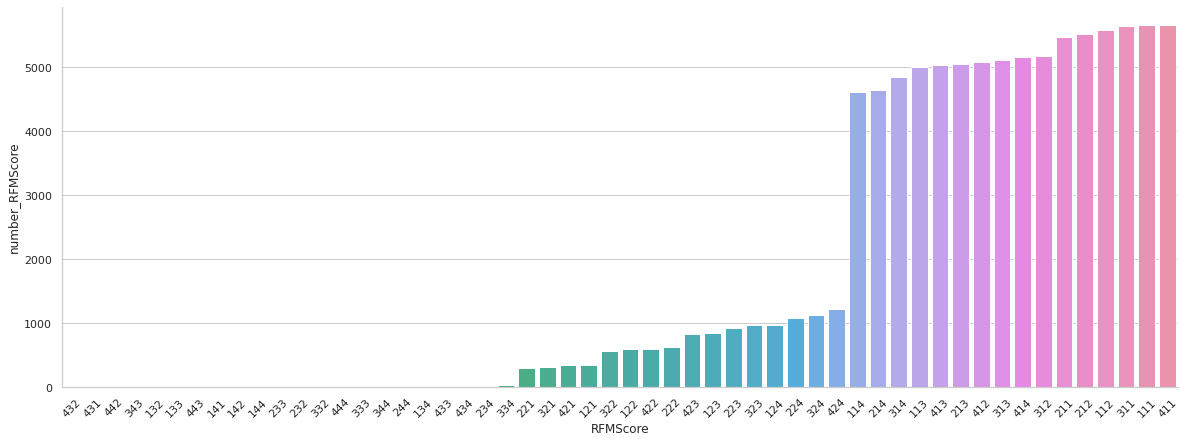

In [70]:
#21. Визуализируем полученные результаты.
ax = sns.barplot(x = 'RFMScore', y = 'number_RFMScore', data = rfm_table_fig)
ax.set_xticklabels(rfm_table_fig.RFMScore, rotation=45)
sns.despine()

Определяем границы каждого сегмента.

r_segment: сегментация покупателей по показателю recency происходила по перцентилям. Как мы можем видить из шага #17, минимальное значение r_score равняется 52, то есть самый короткий интервал между последной покупкой и нашей датой для анализа (last_date) составляет 52 дня. Исходя из таблицы в шаге #17, показатель recency был разделен на 4 группы: 0-171 дней -> 4 группа, 171-276 дней -> 3 группа, 276-405 дней -> 2 группа, 405-770 дней -> 1 группа. Если сравнивать данный показатель с другими, то можно заметить обратный порядок группировки (в формате убывания), это сделано для того, чтобы легче было интерпетировать. То есть чем выше значение группы, тем ближе к last_date было совершена покупка.

f_segment: единственный показатель, которые был разделен на группы исходя из соображений автора. Причиной этому является то, что большинство покупателей совершали покупки только 1 раз, поэтому делить по перцентилям привело бы к "неинтерпретируемым" результатам, в частности в определении границ. Поэтому, автором было принято решение создать сегменты со следующими границами:  0-1 раз -> 1 группа, 1-6 раз -> 2 группа, 6-11 раз -> 3 группа, 11-24 раза -> 4 группа.

m_segment: данный показатель также был разделен на группы исходя из перцентильный значений: 0-659.07 -> 1 группа, 659.07-1441.97 -> 2 группа, 1441.97-3211.86 -> 3 группа, 3211.86-1479562.35 -> 4 группа.

Таким образом, можно сделать следующий вывод: покупатель, который получил RFMscore равной 423 - это тот покупатель, который совершил покупку за последние 171 дней, он совершил 1-6 покупок за весь жизненный период существования и принес доход в размере 1441.97-3211.86 рублей (единица измерения условная).  

По полученному графику, мы можем заметить, что примерно треть покупателей, все же совершают 1 покупку, и половина из них приносит низкий доход (правая часть графика). 